In [1]:
from sqlalchemy import create_engine
import pymysql

sqlEngine       = create_engine('mysql+pymysql://root:@127.0.0.1/nlp_with_disaster_tweets', pool_recycle=3600)
dbConnection    = sqlEngine.connect()

In [13]:
%run package_import.ipynb
%run data_profiling.ipynb

In [4]:
df_train = pd.read_sql_query(
    '''
    select *
    from raw_train
    '''

,dbConnection)
df_train.head()

,id,keyword,location,text,target
0,1,None,None,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,None,None,Forest fire near La Ronge Sask. Canada,1
2,5,None,None,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,None,None,"13,000 people receive #wildfires evacuation orders in California",1
4,7,None,None,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


### profile counts for the column target

array([[<AxesSubplot:title={'center':'target'}>]], dtype=object)

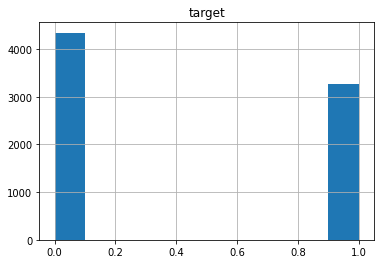

In [10]:
df_train.hist(column='target')

### histogram for characters in tweets

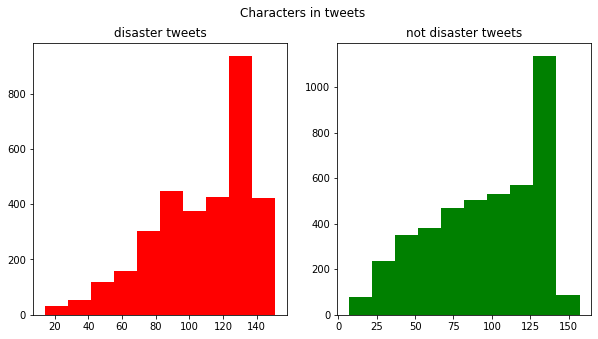

In [28]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
train_disaster_len = df_train[df_train['target']==1]['text'].str.len()
ax1.hist(train_disaster_len,color='red')
ax1.set_title('disaster tweets')
train_non_disaster_len = df_train[df_train['target']==0]['text'].str.len()
ax2.hist(train_non_disaster_len,color='green')
ax2.set_title('not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

### histogram for number of words in tweets

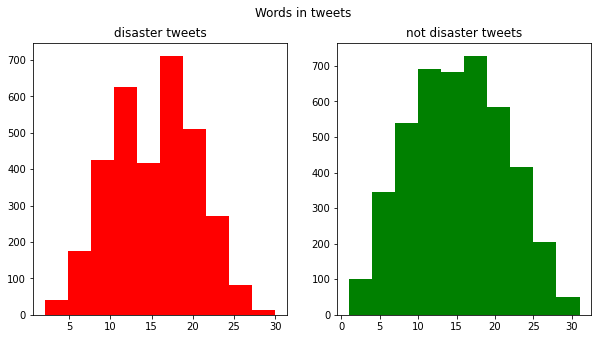

In [36]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
train_disaster_words = df_train[df_train['target']==1]['text'].apply(lambda x: len(x.split()))
ax1.hist(train_disaster_words,color='red')
ax1.set_title('disaster tweets')
train_non_disaster_words = df_train[df_train['target']==0]['text'].apply(lambda x: len(x.split()))
ax2.hist(train_non_disaster_words,color='green')
ax2.set_title('not disaster tweets')
fig.suptitle('Words in tweets')
plt.show()

In [29]:
df_train.head()

,id,keyword,location,text,target
0,1,None,None,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,None,None,Forest fire near La Ronge Sask. Canada,1
2,5,None,None,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,None,None,"13,000 people receive #wildfires evacuation orders in California",1
4,7,None,None,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


NameError: name 'sns' is not defined

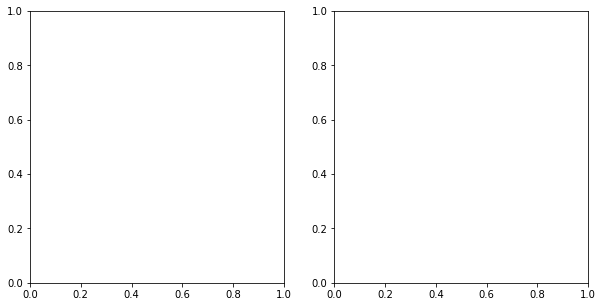

In [41]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
train_disaster_avg_words = df_train[df_train['target']==1]['text'].apply(
    lambda x: np.mean([len(i) for i in x.split()])
    )
sns.distplot(train_disaster_words,color='red', ax=ax1)
ax1.set_title('disaster tweets')
train_non_disaster_avg_words = df_train[df_train['target']==0]['text'].apply(
    lambda x: np.mean([len(i) for i in x.split()])
    )
sns.distplot(train_non_disaster_words,color='green', ax=ax2)
ax2.set_title('not disaster tweets')
fig.suptitle('Words in tweets')
plt.show()

In [40]:
train_disaster_avg_words = df_train[df_train['target']==1]['text'].apply(
    lambda x: np.mean([len(i) for i in x.split()])
    )

0        4.384615
1        4.571429
2        5.090909
3        7.125000
4        4.500000
5        5.166667
6        5.857143
7        3.000000
8        5.666667
9        4.300000
10       3.888889
11       3.814815
12       5.333333
13       4.714286
14       4.090909
31      10.200000
33       8.222222
37       6.000000
38       6.368421
46       6.538462
50       7.222222
51       5.909091
53       8.600000
55       6.157895
56       6.538462
59       7.687500
63       5.043478
65       8.625000
68       7.250000
69       6.750000
72       6.777778
73       8.000000
74       5.000000
77       6.555556
78       4.937500
79       4.111111
81       4.210526
83       8.500000
84       5.666667
85       7.058824
86       7.500000
87       4.958333
88       4.160000
89       7.000000
91       6.250000
92       6.833333
93       7.888889
94      11.500000
95       4.346154
97       5.523810
99       3.454545
100      6.352941
136      6.611111
137      5.850000
139      6.611111
140      5